### 0. Herramientas para generacion y medicion de datos

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import timeit
import time
from timeit import Timer
import numpy as np
import random
import string
from datetime import datetime

import matplotlib.pyplot as plt
random.seed(42)

### 1. Merge Sort recursivo

In [5]:
def merge_sort(lista):
    tam = len(lista)
    
    if(tam==1):
        return lista
    
    mitad = tam//2
    #Para asegurarnos de que todas las particiones sean descompuestas a sus componentes individuales, 
    #llamamos recursivamente a la funcion merge sort
    izquierda = merge_sort(lista[:mitad])
    derecha = merge_sort(lista[mitad:])

    #una vez descompuesto a la unidad, se empieza a unir por las llamadas en el Call Stack
    return merge(izquierda, derecha)
    
##merge es el que realmente ordena, al ir checando los componentes        
def merge(izquierda, derecha):
    lista_ordenada =[]
    i=j=0
    
    while i < len(izquierda) and j < len(derecha):
        #compara los elementos en cada posicion de ambas listas
        if izquierda[i] < derecha[j]:
            lista_ordenada.append(izquierda[i])
            i += 1
        else:
            lista_ordenada.append(derecha[j])
            j +=1
            
    #los elemntos restantes son agregados al final de la lista
    #claro esta que solo 1 de izquierda o derecha tendra elementos que agregar
    lista_ordenada.extend(izquierda[i:])
    lista_ordenada.extend(derecha[j:])
    
    return lista_ordenada

### 2. Merge Sort Iterativo
Tambien llamado "Merge Sort de abajo hacia arriba"

In [6]:
def merge_it(lista, aux, desde, medio, hasta):
 
    k = desde #para la auxiliar
    i = desde #para la original, primera mitad
    j = medio + 1 #para la original, segunda mitad
 
    # while hasta que no halla elementos ni en la izquierda ni en la derecha
    while i <= medio and j <= hasta:
        if lista[i] < lista[j]:
            aux[k] = lista[i]
            i += 1
        else:
            aux[k] = lista[j]
            j += 1
 
        k += 1
 
    #naturalmente, se cumplira una de las 2 condiciones.
    #por lo cual debemos de copiar los elementos restantes
    #aunque es obvio que no ocupamos copiar la otra mitad, porque ya estan ordenados en su posicion
    while i < len(lista) and i <= medio:
        aux[k] = lista[i]
        k += 1
        i += 1
 
    # Copiamos a la lista original para que, ahora si, este ordenado
    for i in range(desde, hasta + 1):
        lista[i] = aux[i]

In [7]:
def mergesort_it(lista):
 
    inicio = 0
    fin = len(lista) - 1
 
    # Ordena la lista usando una lista auxiliar
    aux = lista.copy()
 
    # divide la lista en bloques de tamaño 'm'
    # m = [1, 2, 4, 8, 16…]
 
    m = 1
    while m <= (fin - inicio): #ie, mientras podamos seguir haciendo subdivisiones
 
        # m = 1, i = [0, 2, 4, 6, 8…]
        # m = 2, i = [0, 4, 8, 12…]
        # m = 4, i = [0, 8, 16…]
        # …
 
        for i in range(inicio, fin, 2*m):
            desde = i
            medio = (i + m) - 1
            hasta = min( (i + 2*m - 1), fin) 
            #llegara el punto donde i+2*m superara a fin, en ese caso no podemos llamar a posiciones que no existen
            merge_it(lista, aux, desde, medio, hasta)
 
        m = 2*m

### 3. Quick Sort

In [8]:
def particion(lista,inicio,fin):
    i = (inicio - 1)
    #inicializamos el indice del elemento mas pequeño, mientras que pivote sera el ultimo elemento
    #se que en clase lo hicimos con el primer elemento, pero el libro me enamoro. Lo siento, profesor.
    pivot = lista[fin]
    #haremos un ciclo iterando desde el elemento mas
    for j in range(inicio, fin):
        #si el valor que actualmente estamos recorriendo es menor al pivote, aumentamos el indice del elemento menor
        if lista[j] <= pivot:
            i = i + 1
            lista[i], lista[j] =  lista[j], lista[i]
        #de otro modo (si el valor actual es mayor al pivote), intercambiamos los valores
    lista[i+1],lista[fin] = lista[fin],lista[i+1]
    return (i+1)

def quickSort(lista, inicio, fin):
    #vamos a 
    if inicio < fin:
        indice_de_particion = particion(lista,inicio,fin)
        #sorteamos los elementos antes y despues de la particion
        quickSort(lista, inicio, indice_de_particion - 1)
        quickSort(lista, indice_de_particion + 1, fin)
        
def quick_sort(lista): #sobrecarga no existe en python
    quickSort(lista, 0, len(lista)-1)

### 4. Pruebas de Eficiencia

### 4.1 Generacion de Datos
Seran todas listas de 1000 numeros enteros, para evaluar de manera propia y evitar problemas externos a los procesos de Ordenamiento

Datos Ordenados (ascendente, descendiente y todos iguales)

In [9]:
arreglo_ascendiente = []
arreglo_descendiente = []
arreglo_espejo = []


def generacion_ordenados(n=1000):
    arreglo_ascendiente.clear() 
    arreglo_descendiente.clear()
    arreglo_espejo.clear()
    for i in range(n):
        arreglo_ascendiente.append(i)
    for i in range(n):
        arreglo_descendiente.append(n-i)
    for i in range(n):
        arreglo_espejo.append(0)

Datos Aleatorios

In [91]:
arreglo_aleatorio_1 = []
arreglo_aleatorio_2 = []
arreglo_aleatorio_3 = []

def generacion_aleatorios(n=1000):
    arreglo_aleatorio_1.clear()
    arreglo_aleatorio_2.clear()
    arreglo_aleatorio_3.clear()
    for i in range(n):
        arreglo_aleatorio_1.append(random.randint(0,i))
    for i in range(n):
        arreglo_aleatorio_2.append(random.randint(0,n))
    for i in range(n):
        arreglo_aleatorio_3.append(random.randint(-999999,999999))


[0, 0, 2, 2, 1, 1, 1, 1, 8, 1, 9, 6, 0, 0, 1, 6, 7, 16, 0, 17, 6, 20, 22, 17, 13, 7, 14, 18, 8, 25, 27, 0, 10, 27, 21, 17, 9, 13, 21, 6, 5, 24, 6, 22, 22, 38, 16, 2, 46, 29, 34, 7, 24, 5, 35, 18, 53, 40, 39, 56, 55, 23, 36, 24, 8, 5, 29, 37, 10, 29, 12, 48, 35, 58, 46, 20, 47, 45, 26, 34, 9, 77, 81, 21, 68, 31, 20, 59, 48, 34, 81, 88, 71, 28, 87, 41, 7, 29, 4, 40, 51, 34, 8, 27, 72, 91, 40, 27, 83, 63, 50, 82, 58, 18, 33, 17, 31, 95, 71, 68, 33, 95, 74, 54, 114, 74, 51, 92, 56, 35, 130, 126, 23, 12, 28, 39, 40, 108, 16, 98, 97, 119, 135, 64, 141, 2, 29, 137, 68, 87, 28, 75, 111, 40, 116, 0, 67, 128, 45, 129, 27, 160, 76, 163, 129, 155, 50, 39, 95, 41, 138, 135, 0, 153, 82, 125, 4, 28, 92, 78, 61, 14, 61, 145, 20, 21, 124, 17, 136, 32, 32, 168, 121, 140, 42, 67, 135, 155, 108, 54, 138, 193, 186, 176, 51, 182, 79, 102, 171, 166, 95, 112, 132, 115, 30, 63, 57, 16, 86, 5, 150, 141, 58, 150, 56, 1, 18, 181, 161, 15, 58, 17, 231, 8, 220, 84, 18, 131, 60, 71, 171, 124, 54, 138, 33, 185, 239, 

#### El peor caso de Merge Sort: 
Es decir, el arreglo que genere el mayor numero de comparaciones. Para esto, tomaremos un arreglo ordenado, lo dividiremos en 2 sublistas, y alternaremos los elementos, como si estuvieramos barajeando las 2 sublistas.

In [11]:
def unir(listaPrincipal, listaIzquierda, listaDerecha, tam_izq, medio, tam_der):
    i = j =0
    while i<= medio - tam_izq:
        listaPrincipal[i]=listaIzquierda[i]
        i+=1
    while j<= tam_der - medio:
        listaPrincipal[i+j] = listaDerecha[j]
        j+=1
        
def split(listaPrincipal, listaIzquierda, listaDerecha, tam_izq, medio, tam_der):
    #este metodo separara los elementos de la lista principal de manera alternante
    #la lista izquierda tendra los elementos en la posicion par; la derecha, los de posicion impar
    i=0
    while i<= medio - tam_izq:
        listaIzquierda [i] = listaPrincipal[i*2]
        i+=1
    i=0
    while i< tam_der - medio:
        listaDerecha[i] = listaPrincipal[i*2 + 1]
        i+=1
def generarPeorCasoPrivado(listaPrincipal, tam_izq, tam_der):
    if (tam_izq<tam_der):
        medio = tam_izq + (tam_der - tam_izq)/2
        #creando las listas auxiliares
        listaIzquierda = [None] * len(listaPrincipal)
        listaDerecha = [None] * len(listaPrincipal)
        split(listaPrincipal, listaIzquierda, listaDerecha, tam_izq, medio, tam_der)
        
        #de manera recursiva, iremos "barajeando" los elemntos
        
        generarPeorCasoPrivado(listaIzquierda, tam_izq, medio)
        generarPeorCasoPrivado(listaDerecha, medio+1, tam_der)
        
        unir(listaPrincipal, listaIzquierda, listaDerecha, tam_izq, medio, tam_der)

def generarPeorCaso(lista):
    generarPeorCasoPrivado(lista, 0, len(lista)-1)

In [12]:
arreglo_barajeado=[]

def generacion_peor_caso_MS(n):
    generacion_ordenados(n)
    arreglo_barajeado = arreglo_ascendiente.copy()
    generarPeorCaso(arreglo_barajeado)

In [13]:
def inicializar(n=1000):
    generacion_ordenados(n)
    generacion_aleatorios(n)
    generacion_peor_caso_MS(n)

### 4.2 Medicion y Comparacion

Probando El Merge Sort

In [239]:
inicializar(1000)

In [152]:
start_time = time.time()
merge_sort(arreglo_descendiente)
end_time = time.time()
t_ms_1 = (end_time - start_time)*1000
print("La prueba con el arreglo ordenado al revez %s milisegundos" % (t_ms_1))

La prueba con el arreglo ordenado al revez 4.999399185180664 milisegundos


In [162]:
start_time = time.time()
merge_sort(arreglo_espejo)
end_time = time.time()
t_ms_2 = (end_time - start_time)*1000
print("La prueba con el arreglo de 0's duro %s milisegundos" % (t_ms_2))

La prueba con el arreglo de 0's duro 5.955934524536133 milisegundos


In [154]:
start_time = time.time()
merge_sort(arreglo_ascendiente)
end_time = time.time()
t_ms_3 = (end_time - start_time)*1000
print("La prueba con el arreglo ordenado duro %s milisegundos" % (t_ms_3))

La prueba con el arreglo ordenado duro 4.968404769897461 milisegundos


In [155]:
start_time = time.time()
merge_sort(arreglo_aleatorio_3)
end_time = time.time()
t_ms_4 = (end_time - start_time)*1000
print("La prueba con el arreglo aleatorio duro %s milisegundos" % (t_ms_4))

La prueba con el arreglo aleatorio duro 7.988691329956055 milisegundos


In [168]:
start_time = time.time()
merge_sort(arreglo_barajeado)
end_time = time.time()
t_ms_5 = (end_time - start_time)*1000
print("La prueba con el arreglo barajeado duro %s milisegundos" % (t_ms_5))

RecursionError: maximum recursion depth exceeded while calling a Python object

Probando el Merge Sort Iterativo

In [213]:
inicializar()

In [178]:
start_time = time.time()
mergesort_it(arreglo_descendiente)
end_time = time.time()
t_ms_1 = (end_time - start_time)*1000
print("La prueba con el arreglo ordenado al revez %s milisegundos" % (t_ms_1))

La prueba con el arreglo ordenado al revez 11.020183563232422 milisegundos


In [179]:
start_time = time.time()
mergesort_it(arreglo_espejo)
end_time = time.time()
t_ms_2 = (end_time - start_time)*1000
print("La prueba con el arreglo de 0's duro %s milisegundos" % (t_ms_2))

La prueba con el arreglo de 0's duro 8.01396369934082 milisegundos


In [180]:
start_time = time.time()
mergesort_it(arreglo_ascendiente)
end_time = time.time()
t_ms_3 = (end_time - start_time)*1000
print("La prueba con el arreglo ordenado duro %s milisegundos" % (t_ms_3))

La prueba con el arreglo ordenado duro 5.991697311401367 milisegundos


In [188]:
start_time = time.time()
mergesort_it(arreglo_aleatorio_3)
end_time = time.time()
t_ms_4 = (end_time - start_time)*1000
print("La prueba con el arreglo aleatorio duro %s milisegundos" % (t_ms_4))

La prueba con el arreglo aleatorio duro 7.984638214111328 milisegundos


In [231]:
inicializar()
generarPeorCaso(arreglo_ascendiente)
arreglo_barajeado = arreglo_ascendiente.copy()

In [232]:
start_time = time.time()
mergesort_it(arreglo_barajeado)
end_time = time.time()
t_ms_5 = (end_time - start_time)*1000
print("La prueba con el arreglo barajeado duro %s milisegundos" % (t_ms_5))

La prueba con el arreglo barajeado duro 17.08054542541504 milisegundos


Probando el QuickSort

In [163]:
inicializar()

In [164]:
start_time = time.time()
quick_sort(arreglo_descendiente)
end_time = time.time()
t_ms_1 = (end_time - start_time)*1000
print("La prueba con el arreglo ordenado al revez %s milisegundos" % (t_ms_1))

La prueba con el arreglo ordenado al revez 149.02257919311523 milisegundos


In [165]:
start_time = time.time()
quick_sort(arreglo_espejo)
end_time = time.time()
t_ms_2 = (end_time - start_time)*1000
print("La prueba con el arreglo de 0's duro %s milisegundos" % (t_ms_2))

La prueba con el arreglo de 0's duro 207.0600986480713 milisegundos


In [166]:
start_time = time.time()
quick_sort(arreglo_ascendiente)
end_time = time.time()
t_ms_3 = (end_time - start_time)*1000
print("La prueba con el arreglo ordenado duro %s milisegundos" % (t_ms_3))

La prueba con el arreglo ordenado duro 209.13124084472656 milisegundos


In [167]:
start_time = time.time()
quick_sort(arreglo_aleatorio_3)
end_time = time.time()
t_ms_4 = (end_time - start_time)*1000
print("La prueba con el arreglo aleatorio duro %s milisegundos" % (t_ms_4))

La prueba con el arreglo aleatorio duro 5.986690521240234 milisegundos


In [169]:
start_time = time.time()
quick_sort(arreglo_barajeado)
end_time = time.time()
t_ms_5 = (end_time - start_time)*1000
print("La prueba con el arreglo barajeado duro %s milisegundos" % (t_ms_5))

La prueba con el arreglo barajeado duro 0.9019374847412109 milisegundos


Probando Mismo Ordenamiento, diferente cantidad de datos

In [249]:
inicializar(500)#quinientos
start_time = time.time()
quick_sort(arreglo_espejo)
end_time = time.time()
t_qs_1 = (end_time - start_time)*1000
print("La prueba con el arreglo de 2000 0's duro %s milisegundos" % (t_qs_1))

La prueba con el arreglo de 500 0's duro 45.99285125732422 milisegundos


In [252]:
inicializar(2000) # Dos Mil
start_time = time.time()
quick_sort(arreglo_espejo)
end_time = time.time()
t_qs_2 = (end_time - start_time)*1000
print("La prueba con el arreglo de 2000 0's duro %s milisegundos" % (t_qs_2))

La prueba con el arreglo de 2000 0's duro 740.1235103607178 milisegundos


In [253]:
inicializar(10000) #diez Mil

start_time = time.time()
quick_sort(arreglo_espejo)
end_time = time.time()
t_qs_3 = (end_time - start_time)*1000
print("La prueba con el arreglo de 10,000 0's duro %s milisegundos" % (t_qs_3))

RecursionError: maximum recursion depth exceeded in comparison

In [258]:
generacion_aleatorios(500)
start_time = time.time()
merge_sort(arreglo_aleatorio_2)
end_time = time.time()
t_ms_1 = (end_time - start_time)*1000
print("La prueba con el arreglo aleatorio de 500 tardo %s milisegundos" % (t_ms_1))

La prueba con el arreglo aleatorio de 500 tardo 6.010532379150391 milisegundos


In [259]:
generacion_aleatorios(2000)
start_time = time.time()
merge_sort(arreglo_aleatorio_2)
end_time = time.time()
t_ms_1 = (end_time - start_time)*1000
print("La prueba con el arreglo aleatorio de 2000 tardo %s milisegundos" % (t_ms_1))

La prueba con el arreglo aleatorio de 2000 tardo 21.14558219909668 milisegundos


In [260]:
generacion_aleatorios(10000)
start_time = time.time()
merge_sort(arreglo_aleatorio_2)
end_time = time.time()
t_ms_1 = (end_time - start_time)*1000
print("La prueba con el arreglo aleatorio de 10,000 tardo %s milisegundos" % (t_ms_1))

La prueba con el arreglo aleatorio de 10,000 tardo 96.16494178771973 milisegundos


In [261]:
generacion_aleatorios(100000)
start_time = time.time()
merge_sort(arreglo_aleatorio_2)
end_time = time.time()
t_ms_1 = (end_time - start_time)*1000
print("La prueba con el arreglo aletorio de 100,000 tardo %s milisegundos" % (t_ms_1))

La prueba con el arreglo aletorio de 100,000 tardo 1424.0870475769043 milisegundos


### 6. Variaciones de la misma funcion sobre el mismo dataset
##### Se haran 20 pruebas sobre el mismo dataset

6.1 Sobre datos ordenados (ascendente, descendiente e iguales)

In [23]:
generacion_ordenados(1000)
arreglo_des = arreglo_descendiente.copy()
arreglo_ig = arreglo_espejo.copy()
arreglo_or = arreglo_ascendiente.copy()

In [19]:
#pruebas sobre el arreglo de 0's
#la ventaja es que no tengo que estar inicializandolo
merge_sort_datos_iguales = []
quick_sort_datos_iguales = []

for i in range(0, 20):
    start_time = time.time()
    merge_sort(arreglo_ig)
    end_time = time.time()
    duracion_ms = (end_time - start_time)*1000
    
    start_time = time.time()
    quick_sort(arreglo_ig)
    end_time = time.time()
    duracion_qs = (end_time - start_time)*1000
    
    
    merge_sort_datos_iguales.append(duracion_ms)
    quick_sort_datos_iguales.append(duracion_qs)

In [21]:
merge_sort_datos_descendientes = []
quick_sort_datos_descendientes = []

for i in range(0, 20):
    arreglo_des = arreglo_descendiente.copy()    
    start_time = time.time()
    merge_sort(arreglo_des)
    end_time = time.time()
    duracion_ms = (end_time - start_time)*1000
    
    arreglo_des = arreglo_descendiente.copy()
    start_time = time.time()
    quick_sort(arreglo_des)
    end_time = time.time()
    duracion_qs = (end_time - start_time)*1000
    
    
    merge_sort_datos_descendientes.append(duracion_ms)
    quick_sort_datos_descendientes.append(duracion_qs)

In [24]:
merge_sort_datos_ascendientes = []
quick_sort_datos_ascendientes = []

for i in range(0, 20):
    
    start_time = time.time()
    merge_sort(arreglo_or)
    end_time = time.time()
    duracion_ms = (end_time - start_time)*1000
    
    start_time = time.time()
    quick_sort(arreglo_des)
    end_time = time.time()
    duracion_qs = (end_time - start_time)*1000
    
    
    merge_sort_datos_ascendientes.append(duracion_ms)
    quick_sort_datos_ascendientes.append(duracion_qs)

6.2 Sobre datos aleatorios

In [92]:
generacion_aleatorios(1000)
lista_al_1 = arreglo_aleatorio_1.copy()
lista_al_2 = arreglo_aleatorio_2.copy()

In [96]:
merge_sort_datos_aleatorios1 = []
quick_sort_datos_aleatorios1 = []

for i in range(0, 20):
    
    lista_al_1 = arreglo_aleatorio_1.copy()
    start_time = time.time()
    mergesort_it(lista_al_1)
    end_time = time.time()
    duracion_ms = (end_time - start_time)*1000
    
    lista_al_1 = arreglo_aleatorio_1.copy()
    start_time = time.time()
    quick_sort(lista_al_1)
    end_time = time.time()
    duracion_qs = (end_time - start_time)*1000
    
    
    merge_sort_datos_aleatorios1.append(duracion_ms)
    quick_sort_datos_aleatorios1.append(duracion_qs)

In [97]:
merge_sort_datos_aleatorios2 = []
quick_sort_datos_aleatorios2 = []

for i in range(0, 20):    
    lista_al_2 = arreglo_aleatorio_2.copy()
    start_time = time.time()
    mergesort_it(lista_al_2)
    end_time = time.time()
    duracion_ms = (end_time - start_time)*1000
    
    lista_al_2 = arreglo_aleatorio_2.copy()
    start_time = time.time()
    quick_sort(lista_al_2)
    end_time = time.time()
    duracion_qs = (end_time - start_time)*1000
    
    
    merge_sort_datos_aleatorios2.append(duracion_ms)
    quick_sort_datos_aleatorios2.append(duracion_qs)

### 7. Graficas

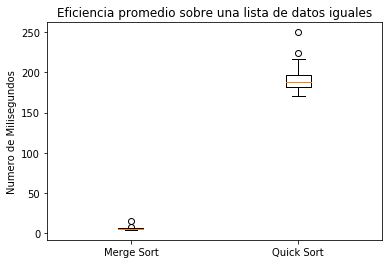

In [83]:
data = [merge_sort_datos_iguales, quick_sort_datos_iguales]
etiquetas = ["Merge Sort", "Quick Sort"]
fig, ax = plt.subplots()

fig.canvas.draw()

plt.boxplot(data)
plt.ylabel('Numero de Milisegundos')
plt.title("Eficiencia promedio sobre una lista de numeros iguales")
ax.set_xticklabels(etiquetas)
plt.show()

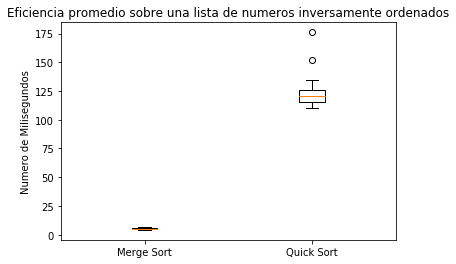

In [100]:
data = [merge_sort_datos_descendientes, quick_sort_datos_descendientes]
etiquetas = ["Merge Sort", "Quick Sort"]
fig, ax = plt.subplots()
fig.canvas.draw()

plt.boxplot(data)
plt.ylabel('Numero de Milisegundos')
plt.title("Eficiencia promedio sobre una lista de numeros inversamente ordenados")
ax.set_xticklabels(etiquetas)
plt.show()

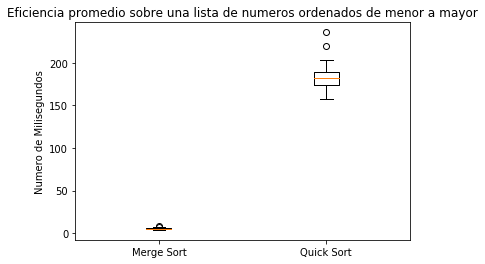

In [101]:
data = [merge_sort_datos_ascendientes, quick_sort_datos_ascendientes]
etiquetas = ["Merge Sort", "Quick Sort"]
fig, ax = plt.subplots()
fig.canvas.draw()

plt.boxplot(data)
plt.ylabel('Numero de Milisegundos')
plt.title("Eficiencia promedio sobre una lista de numeros ordenados de menor a mayor")
ax.set_xticklabels(etiquetas)
plt.show()

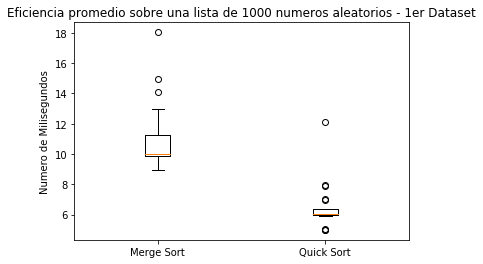

In [102]:
data = [merge_sort_datos_aleatorios1, quick_sort_datos_aleatorios1]
etiquetas = ["Merge Sort", "Quick Sort"]
fig, ax = plt.subplots()
fig.canvas.draw()

plt.boxplot(data)
plt.ylabel('Numero de Milisegundos')
plt.title("Eficiencia promedio sobre una lista de 1000 numeros aleatorios - 1er Dataset")
ax.set_xticklabels(etiquetas)
plt.show()

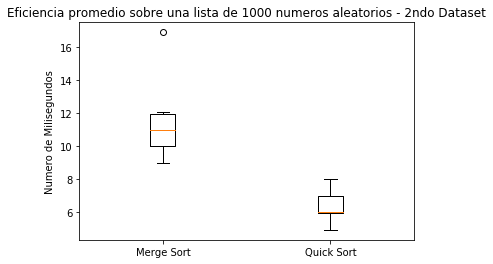

In [104]:
data = [merge_sort_datos_aleatorios2, quick_sort_datos_aleatorios2]
etiquetas = ["Merge Sort", "Quick Sort"]
fig, ax = plt.subplots()
fig.canvas.draw()

plt.boxplot(data)
plt.ylabel('Numero de Milisegundos')
plt.title("Eficiencia promedio sobre una lista de 1000 numeros aleatorios - 2ndo Dataset")
ax.set_xticklabels(etiquetas)
plt.show()